In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, linalg
import os
import sys

In [5]:
df = pd.read_excel(os.path.join(os.getcwd(), 'KedmaKedmaDataForModel.xls')).rename(columns={"mean_prctile33": "prctile33", "mean_three_ring": "mean_third_ring",
                                                                                             "median_three_ring": "median_third_ring",
                                                                                             "median_First_ring":"median_first_ring",
                                                                                             "mean_First_ring":"mean_first_ring",
                                                                                            "Meanci_1":"meanci_1",
                                                                                             "Meanci_2":"meanci_2"})
df.head(5)
Data = df[df.RTK_Num_All_Plots_Data.notnull()].copy(True)
Data=Data.drop(['row','Site_Name','cluster_number',
             'Tree_num','Longitude_All_Plots_Data','Latitude_All_Plots_Data','Std_plot','centroidY','centroidX',
              'Tree_Num','Date','TypeNew','RTK_Num_Malfunctions',
             'Longitude_Malfunctions','Latitude_Malfunctions','Check_Num','Plot_Malfunctions',
             'Row_Malfunctions','puddle','wods','Comment'], axis=1)
Data.info()
# Data = Data.iloc[:, np.r_[0:32,39:40,45:46]] 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  204 non-null    float64
 1   Plot_All_Plots_Data     204 non-null    object 
 2   mean                    204 non-null    float64
 3   min                     204 non-null    float64
 4   prctile5                204 non-null    float64
 5   max                     204 non-null    float64
 6   prctile95               204 non-null    float64
 7   std                     204 non-null    float64
 8   MTD                     204 non-null    float64
 9   median                  204 non-null    float64
 10  skewness                204 non-null    float64
 11  kurtosis                204 non-null    float64
 12  IQR                     204 non-null    float64
 13  MAD                     204 non-null    float64
 14  meanci_1                204 non-null    fl

In [6]:
Data['mean'] = Data['mean'] - Data['AirTemp']
Data['min'] = Data['min'] - Data['AirTemp']
Data['prctile5'] = Data['prctile5'] - Data['AirTemp']
Data['max'] = Data['max'] - Data['AirTemp']
Data['prctile95'] = Data['prctile95'] - Data['AirTemp']
Data['median'] = Data['median'] - Data['AirTemp']
Data['meanci_1'] = Data['meanci_1'] - Data['AirTemp']
Data['meanci_2'] = Data['meanci_2'] - Data['AirTemp']
Data['prctile33'] = Data['prctile33'] - Data['AirTemp']
Data['mean_first_ring'] = Data['mean_first_ring'] - Data['AirTemp']
Data['mean_second_ring'] = Data['mean_second_ring'] - Data['AirTemp']
Data['mean_third_ring'] = Data['mean_third_ring'] - Data['AirTemp']
Data['mean_core'] = Data['mean_core'] - Data['AirTemp']
Data['median_first_ring'] = Data['median_first_ring'] - Data['AirTemp']
Data['median_second_ring'] = Data['median_second_ring'] - Data['AirTemp']
Data['median_third_ring'] = Data['median_third_ring'] - Data['AirTemp']
Data['median_core'] = Data['median_core'] - Data['AirTemp']
Data=Data.drop(['AirTemp'],axis=1)

In [7]:
Exclude_vars = ['SWP','Type','RTK_Num_All_Plots_Data','Plot_All_Plots_Data']
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  204 non-null    float64
 1   Plot_All_Plots_Data     204 non-null    object 
 2   mean                    204 non-null    float64
 3   min                     204 non-null    float64
 4   prctile5                204 non-null    float64
 5   max                     204 non-null    float64
 6   prctile95               204 non-null    float64
 7   std                     204 non-null    float64
 8   MTD                     204 non-null    float64
 9   median                  204 non-null    float64
 10  skewness                204 non-null    float64
 11  kurtosis                204 non-null    float64
 12  IQR                     204 non-null    float64
 13  MAD                     204 non-null    float64
 14  meanci_1                204 non-null    fl

In [8]:
description=Data.describe(include='all')  
description

,RTK_Num_All_Plots_Data,Plot_All_Plots_Data,mean,min,prctile5,max,prctile95,std,MTD,median,...,mean_third_ring,mean_core,median_first_ring,median_second_ring,median_third_ring,median_core,CWSI,CWSI_minus_CWSI_of_row,Type,SWP
count,204.000000,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204,192.000000
unique,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clog,NaN
freq,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,NaN
mean,124.901961,NaN,5.382804,1.679926,2.320892,13.976639,11.145546,2.715237,12.296713,4.623480,...,3.250757,2.930828,5.926386,3.867820,3.131752,2.865780,0.388999,0.021631,NaN,25.301927
std,61.213832,NaN,1.354520,1.215697,1.303129,1.161514,1.234172,0.392967,1.255402,1.519676,...,1.515863,1.624189,1.580339,1.526522,1.501418,1.619403,0.383532,0.299917,NaN,4.723075
min,21.000000,NaN,1.151393,-1.120859,-0.541439,11.387109,7.198557,1.784708,8.941899,0.254141,...,-0.134963,-0.284864,0.702219,0.046249,-0.153618,-0.310156,-0.503677,-0.831342,NaN,17.100000
25%,71.750000,NaN,4.398604,0.730219,1.368688,13.436475,10.356236,2.429478,11.345208,3.625653,...,2.257680,1.758125,4.856122,2.917928,2.108002,1.667617,0.107554,-0.185905,NaN,21.875000
50%,122.500000,NaN,5.374422,1.729065,2.382464,13.935579,11.199283,2.686553,12.201637,4.614118,...,3.236894,2.870272,5.903054,3.941690,3.079831,2.818754,0.398921,0.042517,NaN,24.400000
75%,178.250000,NaN,6.473406,2.646780,3.240423,14.282808,11.774475,2.970674,13.279863,5.720114,...,4.226841,4.002944,7.148587,5.006939,4.177644,3.991700,0.673030,0.249843,NaN,28.725000


# Respons variable

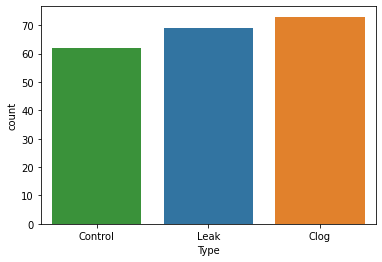

Clog       73
Leak       69
Control    62
Name: Type, dtype: int64


In [9]:
sns.countplot(data=Data, x="Type",palette={"Leak":"tab:blue","Control":"tab:green","Clog":"tab:orange"})
plt.show()
s = df['Type'].value_counts()
print(s)

In [10]:
predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core', 'CWSI', 'CWSI_minus_CWSI_of_row','kurtosis']

# Histogramm, Boxplots, and Scatterplots with a regression lines

In [11]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

KeyError: nan

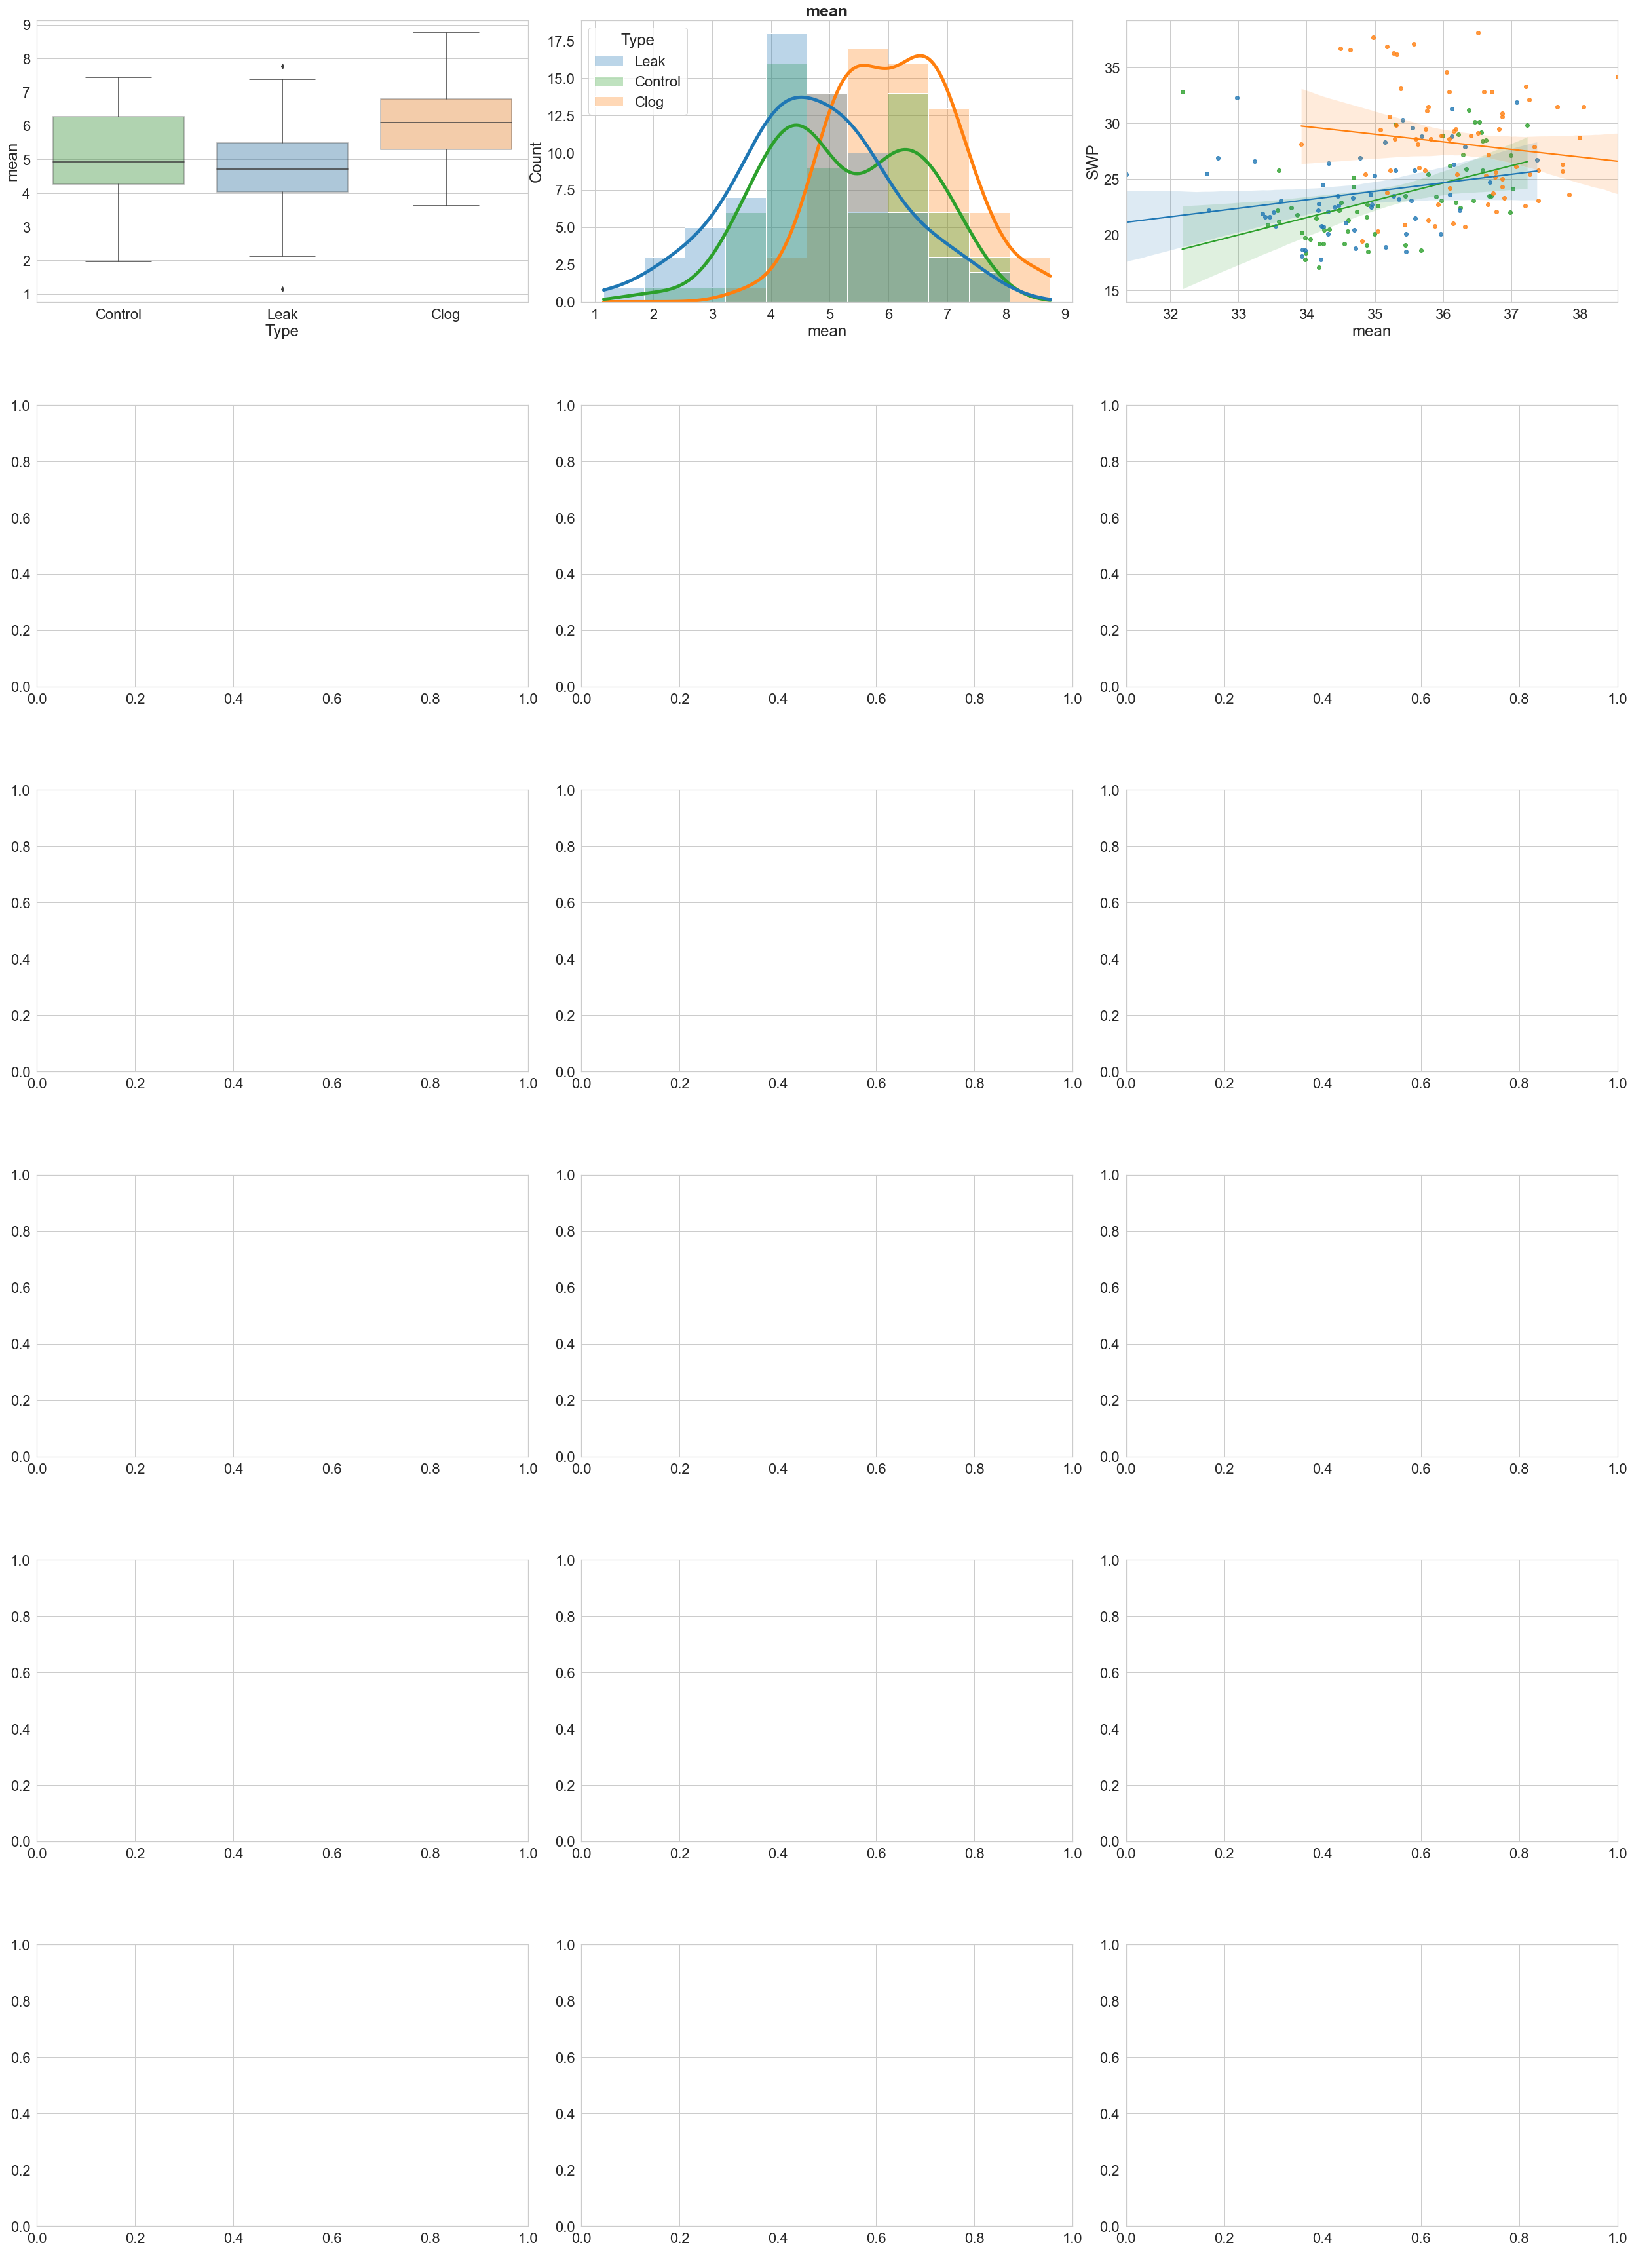

In [12]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
import math
rows_in_fig = 6
a=rows_in_fig #len(predictors)
b=3
c=1
var_number =1
palette={"Leak":"tab:blue","Control":"tab:green","Clog":"tab:orange"} 
# fig = plt.figure(figsize=(30,a*8))
fig, axes = plt.subplots(a,b,figsize=(35,a*8))
fig.tight_layout(h_pad=5)

for i in Data[predictors]:
    plt.xlabel(' ')
    sns.boxplot(x="Type", y=i, data=Data,palette=palette,boxprops=dict(alpha=.4),ax=axes[c-1,0])
    
#     plt.title("\n %s" % i, fontsize=25,fontweight="bold")
    plt.xlabel(' ')
    sns.histplot(Data, x=i, hue="Type",hue_order=["Leak","Control","Clog"],kde=True,legend= True,palette=palette,alpha=.3,
                 line_kws=dict(linewidth=5),ax=axes[c-1,1])
    axes[c-1,1].set_title(i, fontsize=25,fontweight="bold")

    plt.xlabel(' ')
#     plt.title("(%s)" % (math.ceil(c/3)+iteret), fontsize=25,fontweight="bold",loc='right')
    hue_regplot(data=df, x=i, y='SWP', hue='Type',palette=palette, ax=axes[c-1,2])
    axes[c-1,2].set_title("(%s)" % var_number,fontsize=25,fontweight="bold",loc='right')

#     sns.scatterplot(data = df, x = i, y = 'SWP', hue = 'Type',palette=palette,alpha=.8,legend= False)
#     sns.displot(df, x=i, hue="Type",hue_order=["Leak","Clog","Control"],  kind="kde",fill=True,legend= False)
    c=c+1
    var_number = var_number+1
    if c==rows_in_fig+1:
        plt.show()
        fig, axes = plt.subplots(a,b,figsize=(35,a*8))
        fig.tight_layout(h_pad=5)
        c = 1
plt.show()
    

# Outliers

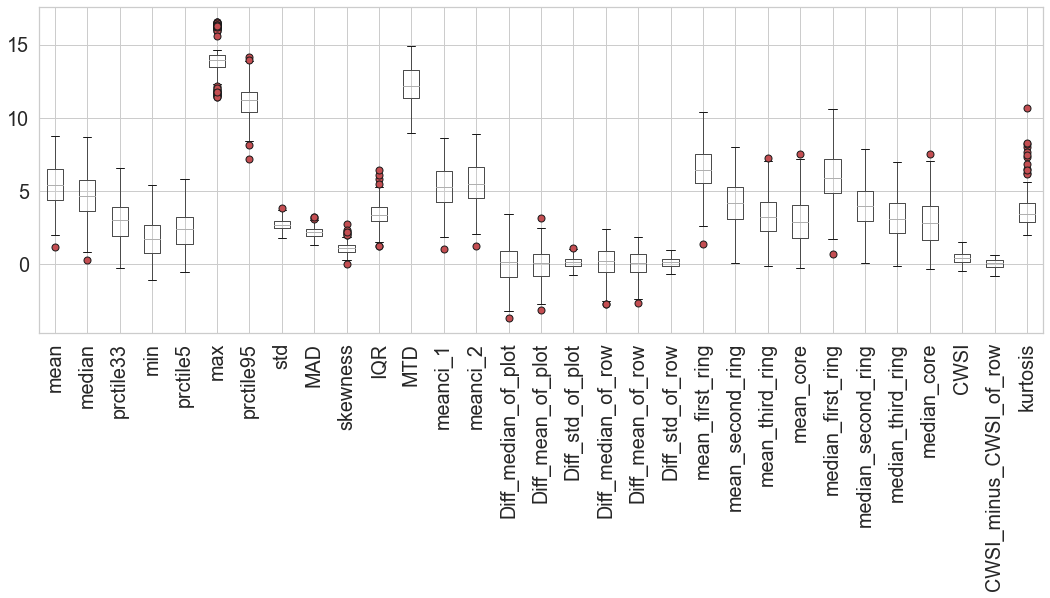

In [13]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")

df_to_exclude_outliers=Data[predictors].copy(True)
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k');
df_to_exclude_outliers.boxplot(figsize=(18,6),flierprops=flierprops) ;
plt.xticks(rotation=90);

In [32]:
Data.loc[179, ['RTK_Num_All_Plots_Data']] 


RTK_Num_All_Plots_Data    219.0
Name: 179, dtype: object

In [61]:
import collections
df_without_outliters=Data.copy(True)

outlieres = []
for i in predictors: 
    Q1 = np.quantile(Data[i],0.25)
    Q3 = np.quantile(Data[i],0.75)
    IQR = Q3 - Q1
    lower, upper = Q1-1.5*IQR, Q3+1.5*IQR
    outlieres.append(df_without_outliters[df_without_outliters[i] < lower].index)
    outlieres.append(df_without_outliters[df_without_outliters[i] > upper].index)

flat_list = [item for sublist in outlieres for item in sublist]
Counter = collections.Counter(flat_list)
outlieres_to_drop={x: count for x, count in Counter.items() if count >= 2}
# print('indices to drop:',outlieres_to_drop.keys())# + 230
print('indices to drop:',len(outlieres_to_drop.keys()))
print(outlieres_to_drop)
df_without_outliters = df_without_outliters.drop(outlieres_to_drop.keys())
df_without_outliters.to_excel("data_Kedma_without_outlires.xlsx") 

indices to drop: 15
{107: 11, 58: 2, 143: 3, 173: 4, 179: 3, 13: 3, 164: 2, 178: 2, 186: 2, 187: 3, 189: 4, 193: 2, 196: 2, 171: 3, 120: 2}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  189 non-null    int64  
 1   Plot_All_Plots_Data     189 non-null    object 
 2   mean                    189 non-null    float64
 3   min                     189 non-null    float64
 4   prctile5                189 non-null    float64
 5   max                     189 non-null    float64
 6   prctile95               189 non-null    float64
 7   std                     189 non-null    float64
 8   MTD                     189 non-null    float64
 9   median                  189 non-null    float64
 10  skewness                189 non-null    float64
 11  kurtosis                189 non-null    float64
 12  IQR                     189 non-null    float64
 13  MAD                     189 non-null    float64
 14  meanci_1                189 non-null    fl

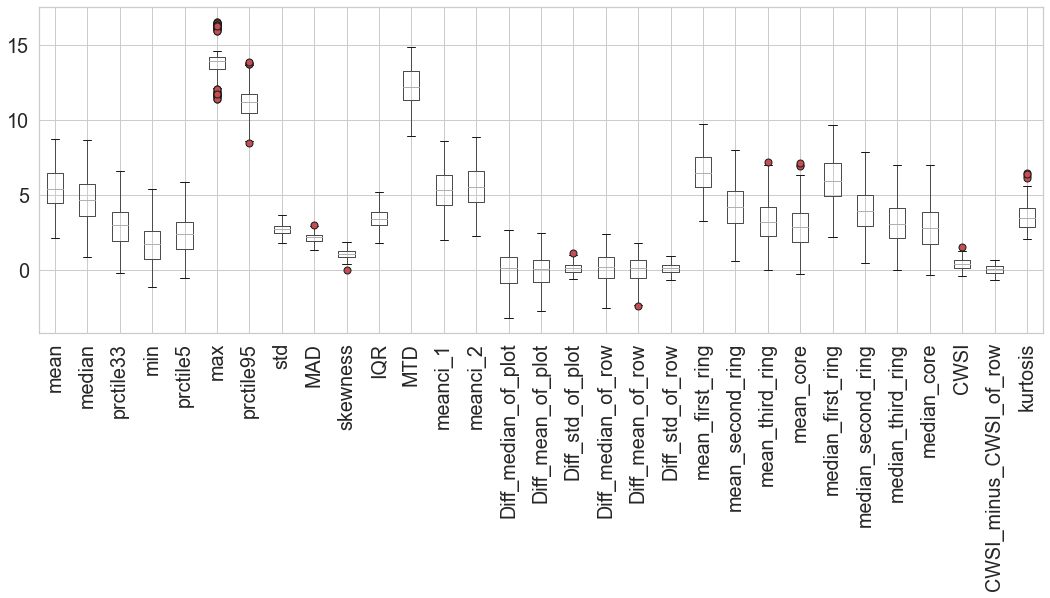

In [62]:
df_out = pd.read_excel(os.path.join(os.getcwd(), 'data_Kedma_without_outlires.xlsx')).iloc[: , 1:]
# df_out1.dropna(how='any')
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k')
df_out[predictors].boxplot(figsize=(18,6),flierprops=flierprops) 
plt.xticks(rotation=90)
df_out.info()

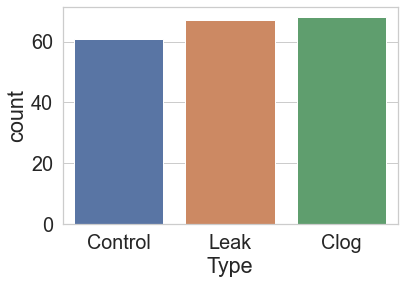

Clog       68
Leak       67
Control    61
Name: Type, dtype: int64


In [19]:
sns.countplot(data=df_out, x="Type")
plt.show()
s = df_out['Type'].value_counts()
print(s)

# correlation

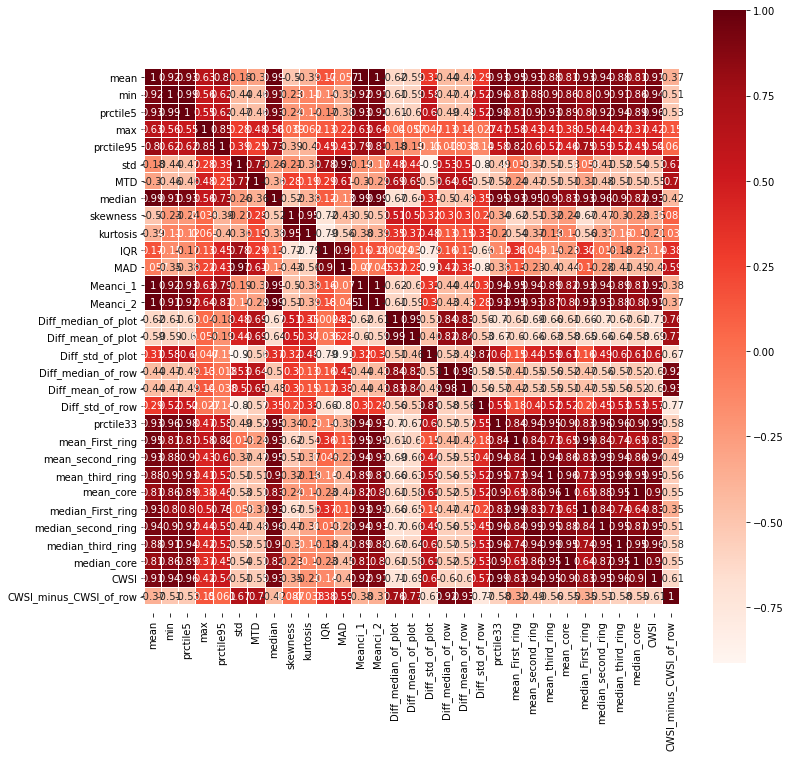

In [24]:
fix,ax = plt.subplots(figsize=(12,12))
Data_x= Data.drop(Exclude_vars,axis=1)
sns.heatmap(Data_x.corr(method='pearson'),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Partial correlation

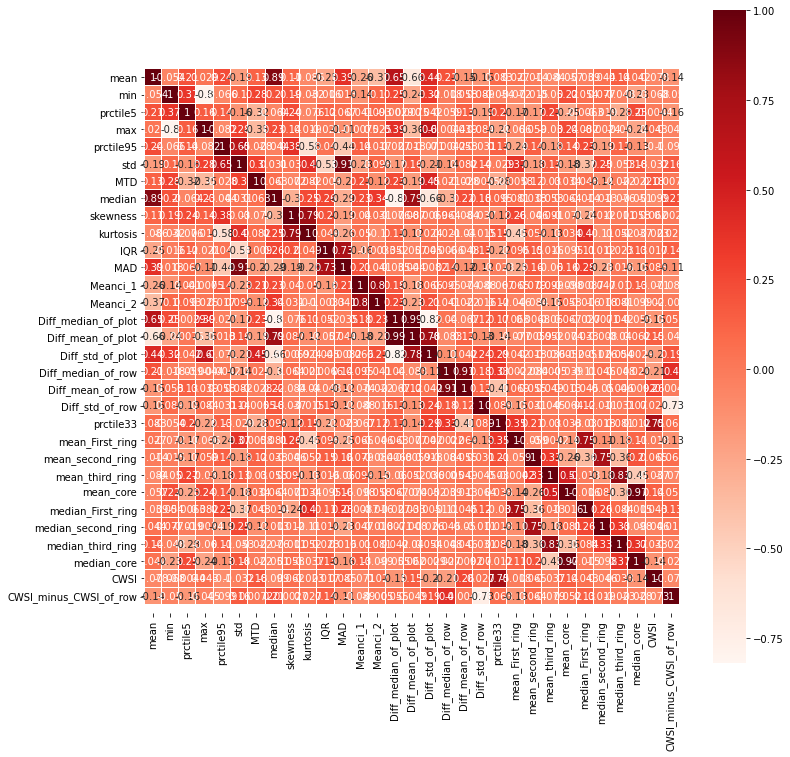

In [25]:
import pingouin as pg
fix,ax = plt.subplots(figsize=(12,12))
sns.heatmap(Data_x.pcorr(),vmax=1,linewidths=0.01,
           square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Correlated features

In [26]:
corr = Data_x.pcorr()
corr_triu = corr.stack()
filterd = corr_triu[0.7<corr_triu]
filterd[filterd<1]

mean                 median                 0.891996
std                  MAD                    0.908743
median               mean                   0.891996
                     Diff_mean_of_plot      0.793311
skewness             kurtosis               0.791159
kurtosis             skewness               0.791159
IQR                  MAD                    0.734858
MAD                  std                    0.908743
                     IQR                    0.734858
Meanci_1             Meanci_2               0.796605
Meanci_2             Meanci_1               0.796605
Diff_median_of_plot  Diff_mean_of_plot      0.994474
Diff_mean_of_plot    median                 0.793311
                     Diff_median_of_plot    0.994474
                     Diff_std_of_plot       0.780931
Diff_std_of_plot     Diff_mean_of_plot      0.780931
Diff_median_of_row   Diff_mean_of_row       0.908359
Diff_mean_of_row     Diff_median_of_row     0.908359
prctile33            CWSI                   0.

# Spearman Correlation

In [27]:
Data.loc[Data.Type == 'Clog', 'Y'] = 0
Data.loc[Data.Type == 'Control', 'Y'] = 1
Data.loc[Data.Type == 'Leak', 'Y'] = 2

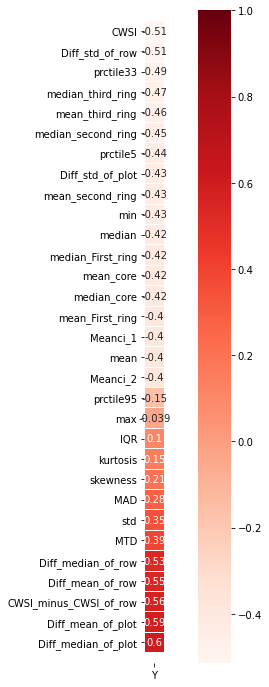

In [28]:
fix,ax = plt.subplots(figsize=(12,12))
sns.heatmap(Data.drop('RTK_Num_All_Plots_Data',axis=1).corr(method='spearman').drop(['mean', 'min', 'prctile5', 'max',
                                               'prctile95', 'std', 'MTD', 'median',
                                               'skewness', 'kurtosis', 'IQR', 'MAD',
                                               'Meanci_1', 'Meanci_2','Diff_median_of_plot',
                                               'Diff_std_of_plot', 'CWSI', 'Diff_median_of_row',
                                               'Diff_mean_of_row', 'Diff_std_of_row',
                                               'Diff_mean_of_plot','prctile33',
                                               'mean_First_ring','mean_second_ring',
                                               'mean_third_ring','mean_core','median_First_ring',
                                               'median_second_ring','median_third_ring',
                                               'median_core','CWSI','CWSI_minus_CWSI_of_row'], axis=1)
            .sort_values(by=['Y'])
            .drop(['Y'], axis=0),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Reds')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

## partial Spearman Correlation

In [29]:
Exclude_vars = ['Type','RTK_Num_All_Plots_Data','Plot_All_Plots_Data','Y']
All_spearman_pcorr = pd.DataFrame()
for i in Data.drop(Exclude_vars, axis=1).columns:
    spearman_pcorr = pg.partial_corr(data = Data,x=i,y= 'Y', method = 'spearman')
    spearman_pcorr['X'] = i
    All_spearman_pcorr = All_spearman_pcorr.append(spearman_pcorr)
All_spearman_pcorr = All_spearman_pcorr.reset_index().drop(['index'], axis=1)
All_spearman_pcorr['r_abs']=All_spearman_pcorr.r.abs()
All_spearman_pcorr['p-val']<=0.05 #just IQR is not stat sig
All_spearman_pcorr.sort_values(by=['r_abs'])


,n,r,CI95%,p-val,X,r_abs
3,204,-0.038807,"[-0.18, 0.1]",5.815788e-01,max,0.038807
10,204,0.101283,"[-0.04, 0.24]",1.494620e-01,IQR,0.101283
9,204,0.150064,"[0.01, 0.28]",3.216844e-02,kurtosis,0.150064
4,204,-0.153010,"[-0.28, -0.02]",2.889766e-02,prctile95,0.153010
8,204,0.211986,"[0.08, 0.34]",2.335886e-03,skewness,0.211986
11,204,0.279590,"[0.15, 0.4]",5.124712e-05,MAD,0.279590
5,204,0.348821,"[0.22, 0.46]",3.169846e-07,std,0.348821
6,204,0.394207,"[0.27, 0.5]",5.418824e-09,MTD,0.394207
13,204,-0.396193,"[-0.51, -0.27]",4.469404e-09,Meanci_2,0.396193
0,204,-0.398007,"[-0.51, -0.28]",3.744100e-09,mean,0.398007


### Elimination of highly correlated features that were less correlat with Y

In [30]:
DataNew = Data.drop(['mean','MAD','Diff_mean_of_plot',
                     'Diff_median_of_row','mean_First_ring',
                     'mean_second_ring','mean_third_ring',
                     'mean_core','kurtosis','max'], axis=1).copy(True)
DataNew

,RTK_Num_All_Plots_Data,Plot_All_Plots_Data,min,prctile5,prctile95,std,MTD,median,skewness,IQR,...,Diff_std_of_row,prctile33,median_First_ring,median_second_ring,median_third_ring,median_core,CWSI,CWSI_minus_CWSI_of_row,Type,Y
0,73.0,B,-29.712988,-29.026532,-19.895924,2.771471,12.973789,-26.968066,1.236983,3.132873,...,-0.020616,1.733215,4.382695,2.593547,1.849573,1.350348,0.046646,0.277926,Control,1.0
1,40.0,I,-29.554907,-28.996197,-18.437605,3.345454,13.661514,-27.246409,1.235347,4.173621,...,-0.389405,1.441941,4.937750,2.152971,1.704653,1.352419,-0.069571,0.255195,Leak,2.0
2,132.0,C,-29.482341,-29.020738,-19.294546,2.964396,13.744397,-27.343463,1.533739,3.170061,...,0.068012,1.476062,4.458358,2.108500,1.811339,1.279233,-0.028400,0.179078,Control,1.0
3,147.0,B,-30.269548,-29.319628,-20.498804,2.639929,12.751985,-27.524008,1.474568,2.720474,...,0.091777,1.416394,3.789390,2.115043,1.527097,1.459312,0.011861,0.170073,Leak,2.0
4,57.0,I,-28.066223,-27.541485,-19.060302,2.546480,12.969797,-26.014644,1.857175,2.113613,...,0.198757,2.435021,4.046498,2.985232,3.028501,2.552793,0.123570,0.037510,Control,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,39.0,H,-28.255142,-27.636872,-19.093782,2.654665,12.208252,-25.732883,1.277818,3.183335,...,0.353332,2.800614,5.583948,3.508248,2.874202,2.661462,0.338853,-0.110986,Leak,2.0
200,64.0,C,-30.045544,-29.151674,-19.041468,3.163497,14.343914,-27.534763,1.465296,3.054836,...,-0.411500,1.235073,3.205566,1.774596,1.581250,1.654727,-0.098728,0.372105,Leak,2.0
201,77.0,D,-27.086250,-26.564099,-18.331658,2.559801,10.349067,-23.300703,0.379198,4.101421,...,0.105174,4.424239,8.376465,5.604891,4.229669,3.390942,0.831974,-0.194867,Leak,2.0
202,111.0,E,-26.891819,-25.890998,-18.531393,2.335811,10.810413,-23.701443,0.794275,3.580083,...,0.193455,4.611382,7.387543,5.598088,4.789036,4.591479,0.886589,-0.057650,Leak,2.0


### Exmine VIF after feature elimination

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
X = DataNew.drop(Exclude_vars,axis=1)
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature           VIF
0                      min  3.708454e+04
1                 prctile5  8.378221e+04
2                prctile95  1.868434e+04
3                      std  7.753261e+03
4                      MTD  3.126927e+03
5                   median  5.887184e+04
6                 skewness  2.176248e+02
7                      IQR  6.718722e+02
8                 Meanci_1  9.410537e+05
9                 Meanci_2  1.049509e+06
10     Diff_median_of_plot  1.315054e+01
11        Diff_std_of_plot  4.452185e+01
12        Diff_mean_of_row  3.687273e+01
13         Diff_std_of_row  1.275502e+01
14               prctile33  1.332239e+03
15       median_First_ring  6.487708e+02
16      median_second_ring  3.512241e+02
17       median_third_ring  2.329605e+02
18             median_core  5.842872e+01
19                    CWSI  2.429889e+02
20  CWSI_minus_CWSI_of_row  4.838719e+01


# Outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   min                     204 non-null    float64
 1   prctile5                204 non-null    float64
 2   prctile95               204 non-null    float64
 3   std                     204 non-null    float64
 4   MTD                     204 non-null    float64
 5   median                  204 non-null    float64
 6   skewness                204 non-null    float64
 7   IQR                     204 non-null    float64
 8   Meanci_1                204 non-null    float64
 9   Meanci_2                204 non-null    float64
 10  Diff_median_of_plot     204 non-null    float64
 11  Diff_std_of_plot        204 non-null    float64
 12  Diff_mean_of_row        204 non-null    float64
 13  Diff_std_of_row         204 non-null    float64
 14  prctile33               204 non-null    fl

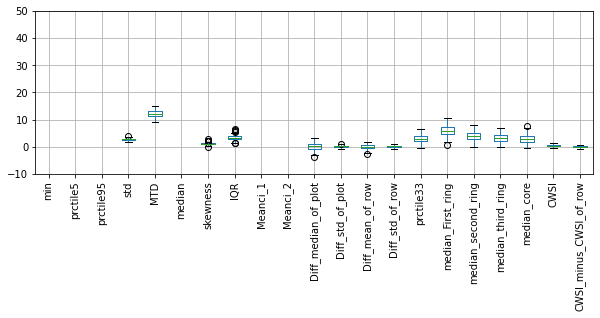

In [32]:
df3=DataNew.drop('Y', axis=1).copy()
df4=DataNew.drop(Exclude_vars, axis=1)

df4.boxplot(figsize=(10,3)) 
plt.ylim(-10, 50)
plt.xticks(rotation=90)
df4.info()

In [33]:
df_outliters=df3
for i in df4.columns: 
    Q1 = np.quantile(df3[i],0.25)
    Q3 = np.quantile(df3[i],0.75)
    IQR = Q3 - Q1
    lower, upper = Q1-2*IQR, Q3+2*IQR
    df_outliters = df_outliters.drop(df_outliters[df_outliters[i] < lower].index)
    df_outliters = df_outliters.drop(df_outliters[df_outliters[i] > upper].index)
df_outliters.to_excel("data_Kedma_without_outlires.xlsx") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RTK_Num_All_Plots_Data  198 non-null    int64  
 1   Plot_All_Plots_Data     198 non-null    object 
 2   min                     198 non-null    float64
 3   prctile5                198 non-null    float64
 4   prctile95               198 non-null    float64
 5   std                     198 non-null    float64
 6   MTD                     198 non-null    float64
 7   median                  198 non-null    float64
 8   skewness                198 non-null    float64
 9   IQR                     198 non-null    float64
 10  Meanci_1                198 non-null    float64
 11  Meanci_2                198 non-null    float64
 12  Diff_median_of_plot     198 non-null    float64
 13  Diff_std_of_plot        198 non-null    float64
 14  Diff_mean_of_row        198 non-null    fl

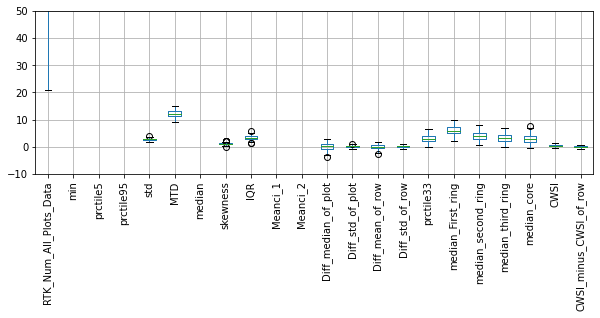

In [34]:
df_out = pd.read_excel(os.path.join(os.getcwd(), 'data_Kedma_without_outlires.xlsx'))
df_out1=df_out.drop(['Type'], axis=1)
df_out1 = df_out1.iloc[: , 1:]
df_out1.dropna(how='any')
df_out1.boxplot(figsize=(10,3)) 
plt.ylim(-10, 50)
plt.xticks(rotation=90)
df_out1.info()

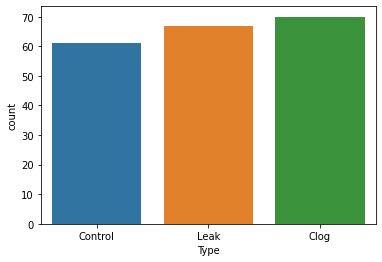

Clog       70
Leak       67
Control    61
Name: Type, dtype: int64


In [35]:
sns.countplot(data=df_out, x="Type")
plt.show()
s = df_out['Type'].value_counts()
print(s)

In [36]:
df_out.head(5)

,Unnamed: 0,RTK_Num_All_Plots_Data,Plot_All_Plots_Data,min,prctile5,prctile95,std,MTD,median,skewness,...,Diff_mean_of_row,Diff_std_of_row,prctile33,median_First_ring,median_second_ring,median_third_ring,median_core,CWSI,CWSI_minus_CWSI_of_row,Type
0,0,73,B,-29.712988,-29.026532,-19.895924,2.771471,12.973789,-26.968066,1.236983,...,1.107438,-0.020616,1.733215,4.382695,2.593547,1.849573,1.350348,0.046646,0.277926,Control
1,1,40,I,-29.554907,-28.996197,-18.437605,3.345454,13.661514,-27.246409,1.235347,...,0.444991,-0.389405,1.441941,4.937750,2.152971,1.704653,1.352419,-0.069571,0.255195,Leak
2,2,132,C,-29.482341,-29.020738,-19.294546,2.964396,13.744397,-27.343463,1.533739,...,0.808817,0.068012,1.476062,4.458358,2.108500,1.811339,1.279233,-0.028400,0.179078,Control
3,3,147,B,-30.269548,-29.319628,-20.498804,2.639929,12.751985,-27.524008,1.474568,...,0.687017,0.091777,1.416394,3.789390,2.115043,1.527097,1.459312,0.011861,0.170073,Leak
4,4,57,I,-28.066223,-27.541485,-19.060302,2.546480,12.969797,-26.014644,1.857175,...,0.540728,0.198757,2.435021,4.046498,2.985232,3.028501,2.552793,0.123570,0.037510,Control


C:\Users\noy\Anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


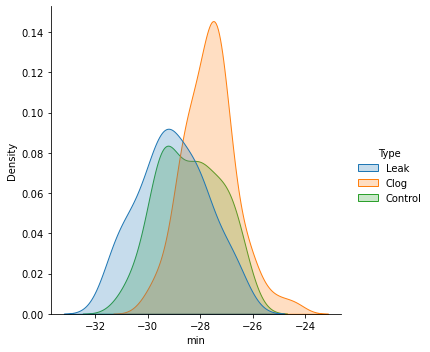

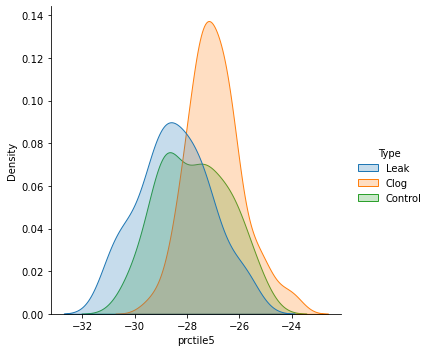

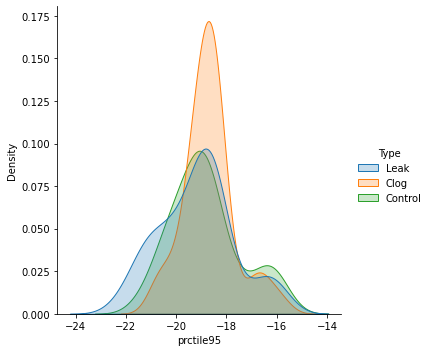

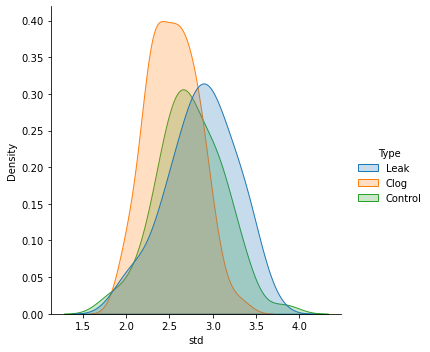

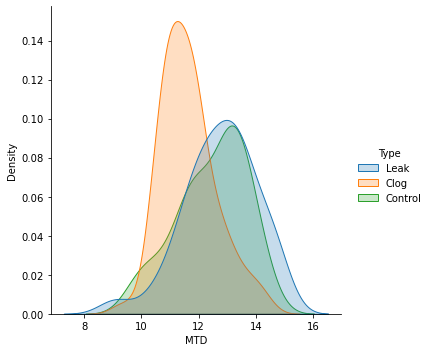

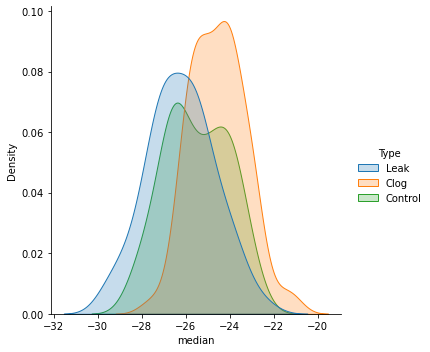

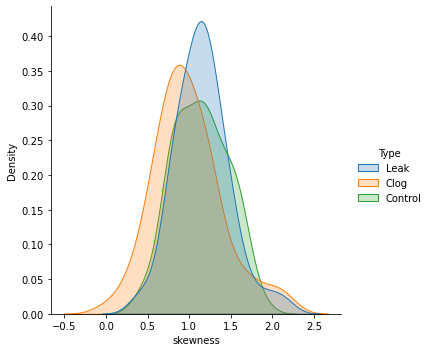

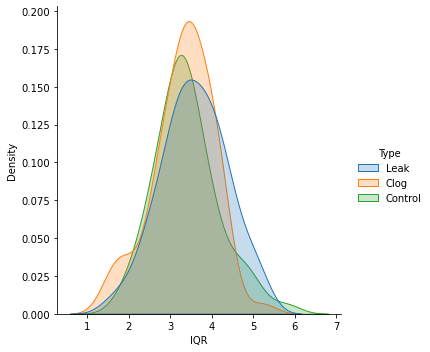

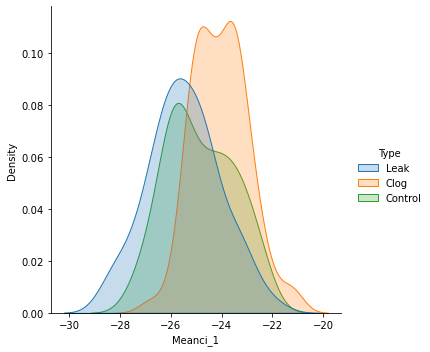

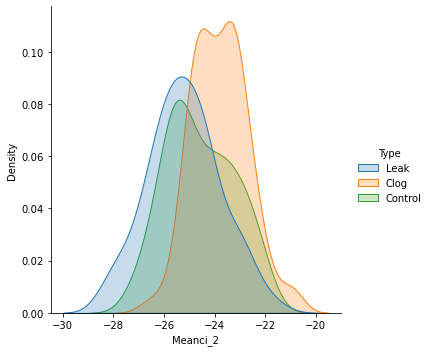

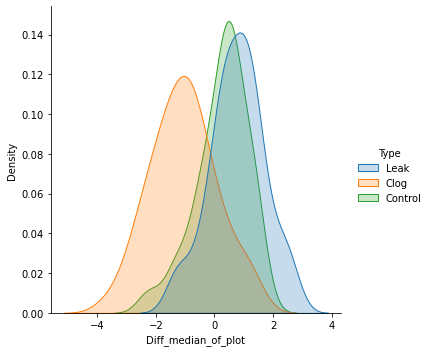

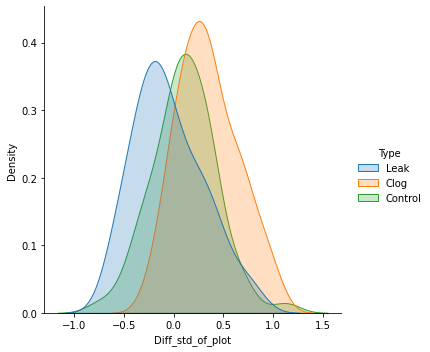

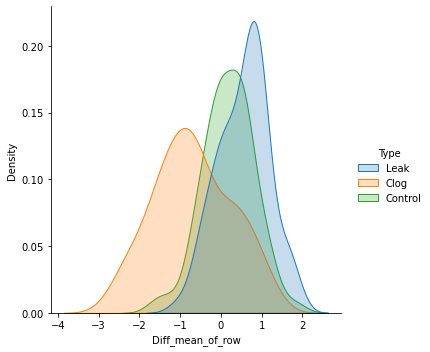

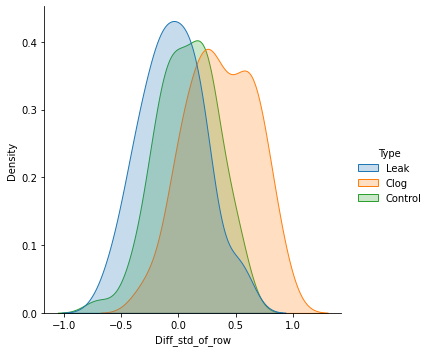

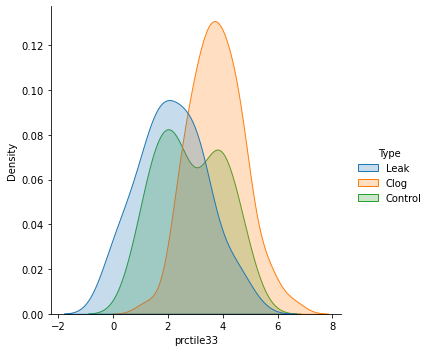

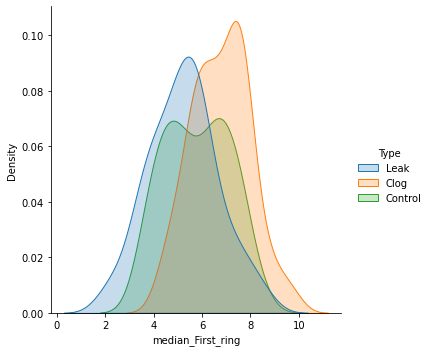

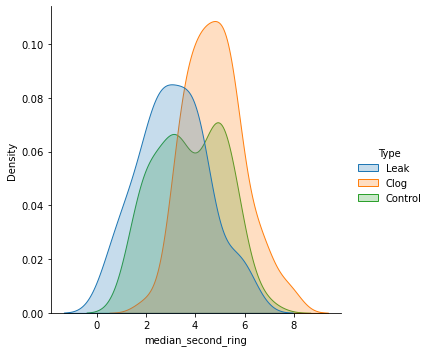

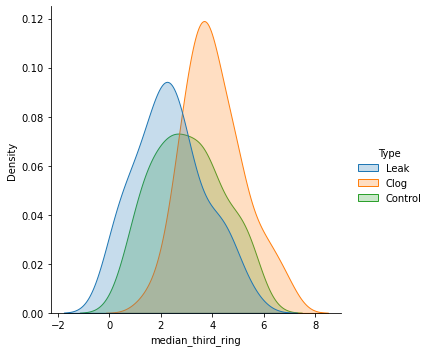

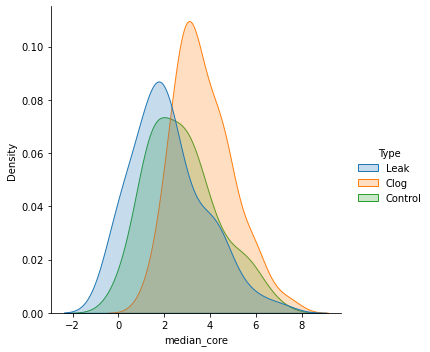

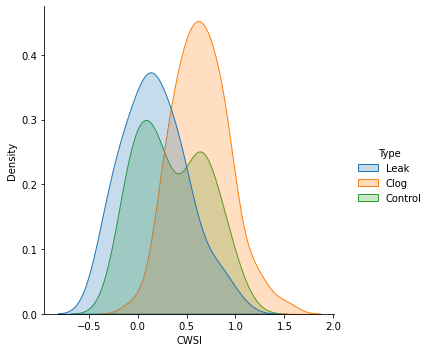

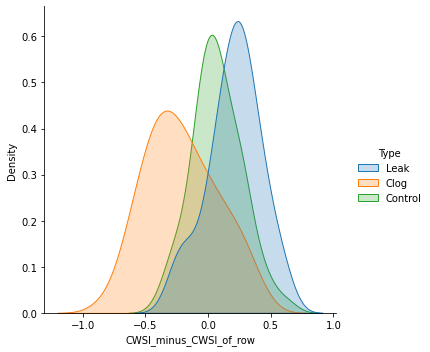

In [37]:
#sns.color_palette("tab10")
for i in df_out1.drop(['RTK_Num_All_Plots_Data','Plot_All_Plots_Data']
,axis=1):
    sns.displot(df_out, x=i, hue="Type",hue_order=['Leak','Clog','Control'],  kind="kde",fill=True)

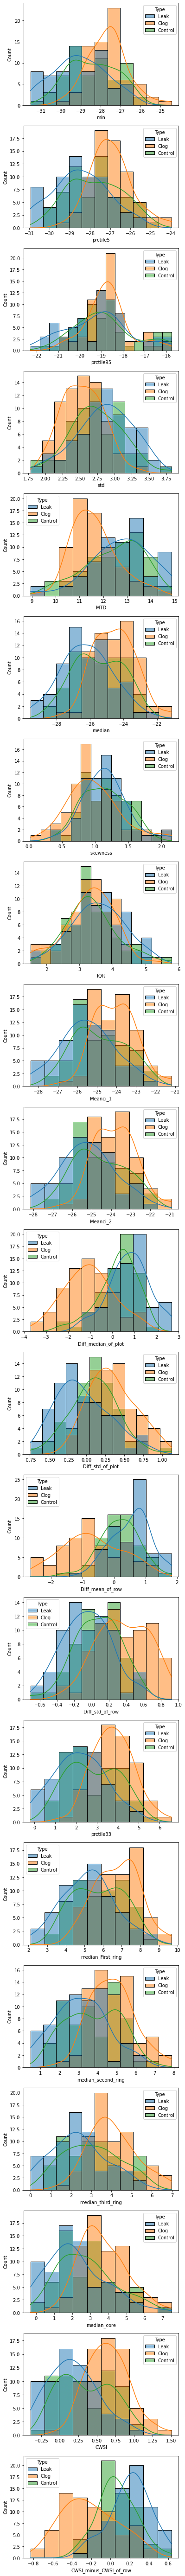

In [79]:
c = 1  # initialize plot counter
fig = plt.figure(figsize=(6,150))
for i in df_out1.drop(['RTK_Num_All_Plots_Data','Plot_All_Plots_Data'], axis=1):
    plt.subplot(31,1,c)
    plt.xlabel(i)
    sns.histplot(df_out, x=i, hue="Type",hue_order=["Leak","Clog","Control"],kde=True)
    c = c + 1
plt.show()